In [1]:
import xarray as xr
import numpy as np

In [17]:
#directory with temp files
direct = '/local/ss23/HISTORICAL_TAS_GFDL_CESM2/'
gfdl_temp = xr.open_dataset(direct+'tas_Amon_GFDL-ESM2M_hist_rcp85_r1i1p1_186101_210512.nc')['tas']
cesm2_temp=xr.open_mfdataset(direct+'tas_Amon_CESM2_hist_ssp370*',combine='nested',concat_dim='ensemble')['tas']

#GFDL grid cell areas
gfdl_area = xr.open_dataset('../data/processed/GFDL/areacella.nc')['areacella']
#match lat coordinates to those of temp file
gfdl_area = gfdl_area.assign_coords({'lat':gfdl_temp['lat']})

/home/aos/kyan/miniconda3/envs/pei/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'tas' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


In [48]:
#area-weighted global average over time
gfdl_global = gfdl_temp.weighted(gfdl_area).mean(['lat','lon'])

#annual average
gfdl_annual = gfdl_global.groupby('time.year').mean()

#historical average (1891-1900)
gfdl_hist = gfdl_annual.sel(year=slice(1861,1899)).mean()

#10-year rolling average
gfdl_rolling = gfdl_annual.rolling(year=10,center=True).mean()
gfdl_contemp = gfdl_rolling.sel(year=slice(2000,2100))

#increase in temperature
gfdl_diff = gfdl_contemp - gfdl_hist

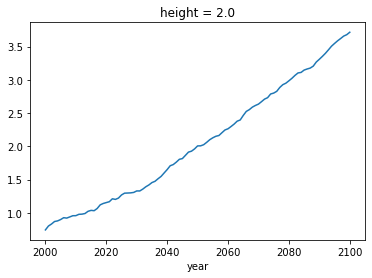

In [49]:
gfdl_diff.plot()